In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import sys
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV



In [4]:
train_X = pd.read_csv('data/train.csv')
test_X = pd.read_csv('data/test.csv')
concat=[train_X, test_X]
concat

[     PassengerId  Survived  Pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 ..           ...       ...     ...   
 886          887         0       2   
 887          888         1       1   
 888          889         0       3   
 889          890         1       1   
 890          891         0       3   
 
                                                   Name     Sex   Age  SibSp  \
 0                              Braund, Mr. Owen Harris    male  22.0      1   
 1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                               Heikkinen, Miss. Laina  female  26.0      0   
 3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                             Allen, Mr. William Henry    male  35.0      0   
 ..                                               

In [5]:
train_X.drop(['PassengerId', 'Cabin'],axis=1, inplace=True)
test_X.drop(['PassengerId', 'Cabin'], axis=1, inplace=True)
train_X.isnull().sum()


Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
dtype: int64

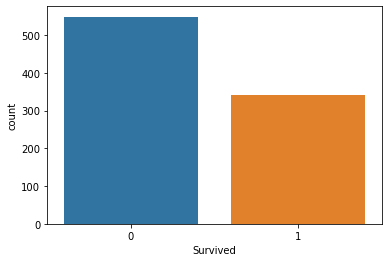

In [6]:
#VISUALIZATION
sns.countplot(train_X['Survived'])

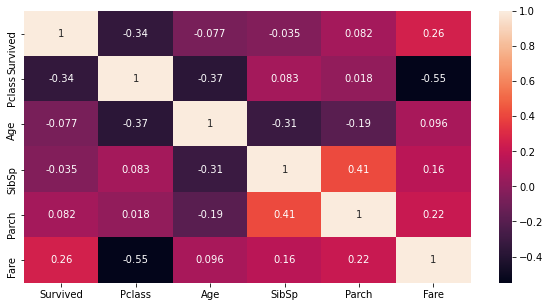

In [7]:
plt.figure(figsize=(10,5))
sns.heatmap(train_X.corr(), annot=True)

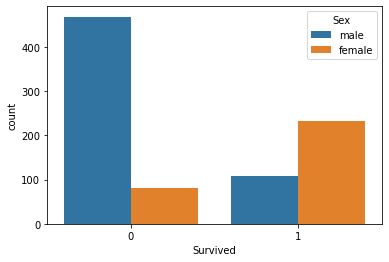

In [8]:
sns.countplot(train_X['Survived'], hue = 'Sex', data=train_X)

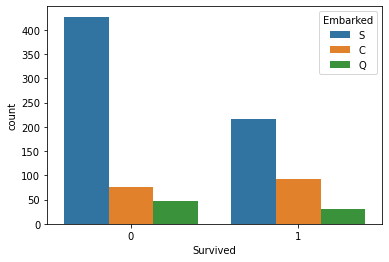

In [9]:
sns.countplot(train_X['Survived'], hue='Embarked', data=train_X)

In [10]:
#Analiz
for i in concat:
    i['Title'] = i.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    train_X=concat[0]; test_X=concat[1]
print(pd.crosstab(train_X['Title'], train_X['Sex']))

Sex       female  male
Title                 
Capt           0     1
Col            0     2
Countess       1     0
Don            0     1
Dr             1     6
Jonkheer       0     1
Lady           1     0
Major          0     2
Master         0    40
Miss         182     0
Mlle           2     0
Mme            1     0
Mr             0   517
Mrs          125     0
Ms             1     0
Rev            0     6
Sir            0     1


In [11]:
train_X[['Title', 'Survived']].groupby('Title').mean()

,Survived
Title,
Capt,0.000000
Col,0.500000
Countess,1.000000
Don,0.000000
Dr,0.428571
Jonkheer,0.000000
Lady,1.000000
Major,0.500000
Master,0.575000


In [12]:
for i in concat:
    i['Title'] = i['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    i['Title'] = i['Title'].replace('Ms','Miss')
    i['Title']=i['Title'].replace('Mme', 'Mrs')
    i['Title'] = i['Title'].replace('Mlle', 'Miss')
test_X

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,Mr
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,Mrs
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,Mr
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,Mr
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,Mrs
...,...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S,Mr
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,Rare
415,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,Mr
416,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S,Mr


In [13]:
train_X['Age'][np.isnan(train_X['Age'])] = train_X['Age'].mean() 
test_X['Age'][np.isnan(test_X['Age'])] = test_X['Age'].mean()

train_X['CategoricalAge'] = pd.cut(train_X['Age'], 5)

print (train_X[['CategoricalAge', 'Survived']].groupby(['CategoricalAge'], as_index=False).mean())

     CategoricalAge  Survived
0    (0.34, 16.336]  0.550000
1  (16.336, 32.252]  0.344168
2  (32.252, 48.168]  0.404255
3  (48.168, 64.084]  0.434783
4    (64.084, 80.0]  0.090909


<ipython-input-13-bc74cd9e84b9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_X['Age'][np.isnan(train_X['Age'])] = train_X['Age'].mean()
<ipython-input-13-bc74cd9e84b9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_X['Age'][np.isnan(test_X['Age'])] = test_X['Age'].mean()


In [14]:
for dataset in concat:
    dataset['FamilySize'] = dataset['Parch'] + dataset['SibSp'] + 1
    dataset['IsAlone'] = dataset['FamilySize'].apply(lambda x: 1 if x>1 else 0)
print(train_X[['IsAlone', 'Survived']].groupby('IsAlone').mean()) 

         Survived
IsAlone          
0        0.303538
1        0.505650


In [15]:
print(train_X[['Embarked', 'Survived']].groupby('Embarked').mean())

          Survived
Embarked          
C         0.553571
Q         0.389610
S         0.336957


In [16]:
train_X=pd.get_dummies(train_X, columns=['Title'], prefix=['Title'])
test_X=pd.get_dummies(test_X, columns=['Title'], prefix=['Title'])

In [17]:
train_X['Sex']=train_X['Sex'].apply(lambda x: 1  if x=='male' else 0)
test_X['Sex']=test_X['Sex'].apply(lambda x: 1  if x=='male' else 0)

train_X['Embarked'] = train_X['Embarked'].map({'S':0, 'C':1, 'Q':2})
test_X['Embarked'] = test_X['Embarked'].map({'S':0, 'C':1, 'Q':2})

train_X = train_X.drop(['Name', 'Ticket'], axis=1)
test_X = test_X.drop(['Name','Ticket'],axis=1)



In [18]:
for dataset in concat:    
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} )
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] 
train_X.drop(['SibSp','Parch','FamilySize'], axis=1,inplace=True)
test_X.drop(['SibSp','Parch','FamilySize'], axis=1,inplace=True)

train_X['Age'] = train_X['Age'].astype(int)
test_X['Age'] = test_X['Age'].astype(int)

train_X.drop('CategoricalAge',axis = 1,inplace = True)

In [19]:
train_X.loc[train_X['Age'] <= 16, 'Age'] = 0
train_X.loc[(train_X['Age'] > 16) & (train_X['Age'] <= 32),'Age'] = 1
train_X.loc[(train_X['Age'] > 32) & (train_X['Age'] <= 48),'Age'] = 2
train_X.loc[(train_X['Age'] > 48) & (train_X['Age'] <= 64),'Age'] = 3
train_X.loc[(train_X['Age'] > 64) & (train_X['Age'] <= 80),'Age'] = 4

In [20]:
test_X.loc[test_X['Age']<=16, 'Age'] = 0
test_X.loc[(test_X['Age'] > 16) & (test_X['Age'] <= 32),'Age'] = 1
test_X.loc[(test_X['Age'] > 32) & (test_X['Age'] <= 48),'Age'] = 2
test_X.loc[(test_X['Age'] > 48) & (test_X['Age'] <= 64),'Age'] = 3
test_X.loc[(test_X['Age'] > 64) & (test_X['Age'] <= 80),'Age'] = 4

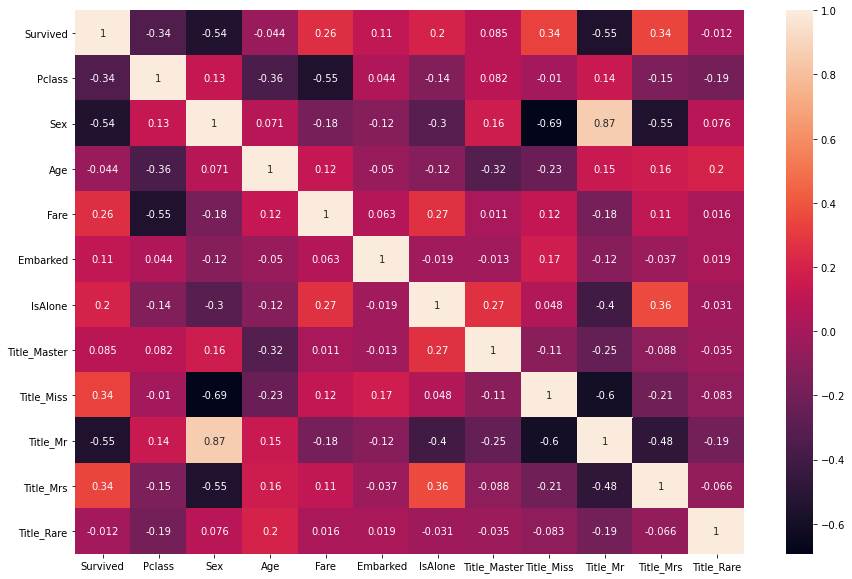

In [21]:
plt.figure(figsize=(15,10))
sns.heatmap(train_X.corr(),annot=True)

In [22]:
train_X_end=train_X.drop('Survived', axis=1)
test_X_end=test_X
train_y=train_X['Survived']
train_X_end

,Pclass,Sex,Age,Fare,Embarked,IsAlone,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,3,1,1,7.2500,0.0,1,0,0,1,0,0
1,1,0,2,71.2833,1.0,1,0,0,0,1,0
2,3,0,1,7.9250,0.0,0,0,1,0,0,0
3,1,0,2,53.1000,0.0,1,0,0,0,1,0
4,3,1,2,8.0500,0.0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
886,2,1,1,13.0000,0.0,0,0,0,0,0,1
887,1,0,1,30.0000,0.0,0,0,1,0,0,0
888,3,0,1,23.4500,0.0,1,0,1,0,0,0
889,1,1,1,30.0000,1.0,0,0,0,1,0,0


In [23]:
#model creation
from catboost import CatBoostClassifier
param_grid = {
    'iterations': [5, 10, 15, 20, 25, 50, 100],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [3, 5, 7, 9, 11, 13],
}
gscv = GridSearchCV(CatBoostClassifier(random_state = 0,verbose = False),param_grid = param_grid, cv = 10,scoring = 'accuracy')
gscv.fit(train_X_end,train_y)
print(gscv.best_score_)
print(gscv.best_params_)

0.830561797752809
{'depth': 9, 'iterations': 100, 'learning_rate': 0.1}


In [24]:
clf = CatBoostClassifier(learning_rate = 0.1,depth = 9,iterations = 100,random_state = 42)

clf.fit(train_X_end,train_y)
clf.best_score_

0:	learn: 0.6592689	total: 12ms	remaining: 1.18s
1:	learn: 0.6281825	total: 22.7ms	remaining: 1.11s
2:	learn: 0.6022701	total: 31.5ms	remaining: 1.02s
3:	learn: 0.5810540	total: 38.8ms	remaining: 931ms
4:	learn: 0.5602023	total: 42.1ms	remaining: 801ms
5:	learn: 0.5429866	total: 49.5ms	remaining: 776ms
6:	learn: 0.5243996	total: 54.1ms	remaining: 719ms
7:	learn: 0.5095573	total: 57.4ms	remaining: 660ms
8:	learn: 0.4997372	total: 58.5ms	remaining: 591ms
9:	learn: 0.4884753	total: 61.1ms	remaining: 550ms
10:	learn: 0.4785507	total: 62.1ms	remaining: 503ms
11:	learn: 0.4689454	total: 68.6ms	remaining: 503ms
12:	learn: 0.4615226	total: 75.5ms	remaining: 505ms
13:	learn: 0.4538151	total: 82.1ms	remaining: 505ms
14:	learn: 0.4468553	total: 86ms	remaining: 487ms
15:	learn: 0.4423291	total: 87.9ms	remaining: 461ms
16:	learn: 0.4383949	total: 90.3ms	remaining: 441ms
17:	learn: 0.4328491	total: 94.1ms	remaining: 428ms
18:	learn: 0.4281771	total: 101ms	remaining: 429ms
19:	learn: 0.4238757	total:

{'learn': {'Logloss': 0.33354787766453264}}

In [25]:
y = clf.predict(test_X)
submit = pd.DataFrame(y,columns = ['Survived'],index = [i + 892 for i in range(0,418)])
submit.index.name = 'PassengerId'
submit.to_csv('catboost.csv')
#Точность - 77.2%